# SENTIMENT ANALYSIS OF TWEETS 
https://zablo.net/blog/post/twitter-sentiment-analysis-python-scikit-word2vec-nltk-xgboost

In [1]:
import tweepy
import pandas as pdte
import numpy as np

In [2]:
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
import sys
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor

In [4]:
def twitter_initialize():
    """ Initialize Twitter Authentication & set up API client """
    try:
        consumer_key = os.environ['TWITTER_CONSUMER_KEY']
        consumer_secret = os.environ['TWITTER_CONSUMER_SECRET']
        access_token = os.environ['TWITTER_ACCESS_TOKEN']
        access_secret = os.environ['TWITTER_ACCESS_SECRET']
    except KeyError:
        sys.stderr.write("TWITTER_* environment variables not set\n")
        sys.exit(1)
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    ## Setup twitter API Client ##
    client = API(auth, wait_on_rate_limit=True)
    return client

In [5]:
api = twitter_initialize()

In [6]:
query = 'BringFamiliesTogether'
number = 10000
result = api.search(lang="en", q=query + " -rt", count = number)
fname = "tweets_{}.jsonl".format(query) 

In [7]:
fname

'ford.jsonl'

In [8]:
with open(fname, 'w') as f:
    for tweet in Cursor(api.search, q=query).items(2000):
        f.write(json.dumps(tweet._json)+"\n")

# Just with 30 tweets

In [479]:
query = 'FamiliesBelongTogether'
number = 5000
result = api.search(lang="en", q=query + " -rt", count = number)
fname = "searcht.jsonl"

In [480]:
with open(fname, 'w') as f:
    for tweet in Cursor(api.search, q=query + " -rt").items(5000):
        f.write(json.dumps(tweet._json)+"\n")

In [427]:
result

[Status(_api=<tweepy.api.API object at 0x000002E00955E0F0>, _json={'created_at': 'Sun Jun 24 15:30:00 +0000 2018', 'id': 1010907904915005440, 'id_str': '1010907904915005440', 'text': 'This is appalling and wrong. \n\nWe demand the end to the policies and practices that criminalize immigrant families,… https://t.co/57gzwiJJJJ', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/57gzwiJJJJ', 'expanded_url': 'https://twitter.com/i/web/status/1010907904915005440', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 28348670, 'id_str': '28348670', 'name': 'YWCA USA', 'screen_

In [39]:
tweets = Cursor(api.search, q=query).items(30)
tweets

In [40]:
for tweet in tweets:
    print(tweet.created_at, tweet.text, tweet.lang)

2018-06-25 15:09:02 RT @YWCAUSA: This is appalling and wrong. 

We demand the end to the policies and practices that criminalize immigrant families, people of… en
2018-06-25 04:14:30 RT @madresanspadre: @RepLoisFrankel They are probably signing away their children and don't even know it... There are not enough words for… en
2018-06-24 23:49:42 RT @YWCAUSA: This is appalling and wrong. 

We demand the end to the policies and practices that criminalize immigrant families, people of… en
2018-06-24 16:44:50 RT @Edna_Mariee: @MrScottLads #WeDoCare because that is how I was raised! 
#IDoCare
#FridayFocus
#NoRA
#BringFamiliesTogether https://t.co/… en
2018-06-24 16:44:47 RT @Edna_Mariee: @MrScottLads #WeDoCare because it is the right thing to do! 
#IDoCare
#FridayFocus
#NoRA
#BringFamiliesTogether https://t.… en
2018-06-24 15:57:31 RT @YWCAUSA: This is appalling and wrong. 

We demand the end to the policies and practices that criminalize immigrant families, people of… en
2018-06-24 15:34:08 

In [428]:
len('tweets_BringFamiliesTogether.jsonl.jsonl')

40

In [481]:
import pandas as pd
tweets_df = pd.read_json("searcht.jsonl", orient = 'records', lines = True)

In [482]:
tweets_df.T

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
contributors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coordinates,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
created_at,2018-06-25 21:45:40,2018-06-25 21:45:39,2018-06-25 21:44:40,2018-06-25 21:44:24,2018-06-25 21:44:13,2018-06-25 21:44:13,2018-06-25 21:44:02,2018-06-25 21:44:02,2018-06-25 21:44:00,2018-06-25 21:43:39,...,2018-06-24 21:03:47,2018-06-24 21:03:39,2018-06-24 21:03:00,2018-06-24 21:02:37,2018-06-24 21:02:31,2018-06-24 21:02:23,2018-06-24 21:02:14,2018-06-24 21:02:05,2018-06-24 21:02:02,2018-06-24 21:02:00
entities,"{'hashtags': [], 'symbols': [], 'user_mentions...",{'hashtags': [{'text': 'FamiliesBelongTogether...,{'hashtags': [{'text': 'FamiliesBelongTogether...,{'hashtags': [{'text': 'FamiliesBelongTogether...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...",{'hashtags': [{'text': 'FamiliesBelongTogether...,...,{'hashtags': [{'text': 'FamiliesBelongTogether...,"{'hashtags': [{'text': 'ComplicitGOP', 'indice...","{'hashtags': [], 'symbols': [], 'user_mentions...",{'hashtags': [{'text': 'familiesbelongtogether...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...",{'hashtags': [{'text': 'WestCountyDetentionCen...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions..."
extended_entities,NaN,"{'media': [{'id': 1011364823580467200, 'id_str...",NaN,"{'media': [{'id': 1011364506906255360, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,1,33,0,0,3
favorited,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
geo,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
id,1011364831298015233,1011364826927509509,1011364579774001153,1011364510085603330,1011364466670256128,1011364465173032961,1011364421384441857,1011364421023817735,1011364411364298752,1011364324986834945,...,1010991901292597250,1010991867943583744,1010991704474779649,1010991609251446784,1010991585218236421,1010991550996758528,1010991510433591296,1010991473884475392,1010991463503683586,1010991455324835840
id_str,1011364831298015232,1011364826927509504,1011364579774001152,1011364510085603328,1011364466670256128,1011364465173032960,1011364421384441856,1011364421023817728,1011364411364298752,1011364324986834944,...,1010991901292597248,1010991867943583744,1010991704474779648,1010991609251446784,1010991585218236416,1010991550996758528,1010991510433591296,1010991473884475392,1010991463503683584,1010991455324835840


### JSON columns with embedded dictionaries are
    entities
    metadata
    user

### Column USER with dictionary keys & Values

In [483]:
tweets_df.user[1].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [484]:
tweets_df.user[1].values()

dict_values([938533034659168256, '938533034659168256', 'Resistbot Open Letters', 'openletterbot', 'United States', 'Real letters delivered to Congress and state governors. Send “resist” as a direct message to @resistbot to write your own. 👊🤖', 'https://t.co/OZBZxHPhF8', {'url': {'urls': [{'url': 'https://t.co/OZBZxHPhF8', 'expanded_url': 'https://resist.bot', 'display_url': 'resist.bot', 'indices': [0, 23]}]}, 'description': {'urls': []}}, False, 4684, 1, 28, 'Wed Dec 06 22:18:07 +0000 2017', 2, None, None, False, True, 80675, 'en', False, False, False, '000000', 'http://abs.twimg.com/images/themes/theme1/bg.png', 'https://abs.twimg.com/images/themes/theme1/bg.png', False, 'http://pbs.twimg.com/profile_images/959525032316686336/04bfFISo_normal.jpg', 'https://pbs.twimg.com/profile_images/959525032316686336/04bfFISo_normal.jpg', 'https://pbs.twimg.com/profile_banners/938533034659168256/1522189451', '0084FF', '000000', '000000', '000000', False, False, False, False, False, False, False, '

In [485]:
onlykeys = ['id_str', 'name', 'screen_name', 'location', 'description']

In [486]:
for i in range(len(onlykeys)):
    tweets_df[onlykeys[i]] = [x.get(onlykeys[i]) for x in tweets_df.user]

### Column entities with dictionary keys & Values

In [487]:
tweets_df.entities[0].keys()

dict_keys(['hashtags', 'symbols', 'user_mentions', 'urls'])

In [488]:
tweets_df.entities[1].values()

dict_values([[{'text': 'FamiliesBelongTogether', 'indices': [69, 92]}], [], [{'screen_name': 'SenToomey', 'name': 'Senator Pat Toomey', 'id': 221162525, 'id_str': '221162525', 'indices': [58, 68]}], [], [{'id': 1011364823580467200, 'id_str': '1011364823580467200', 'indices': [93, 116], 'media_url': 'http://pbs.twimg.com/media/DgkW8tfW4AALeVt.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DgkW8tfW4AALeVt.jpg', 'url': 'https://t.co/H41ZmVEnqq', 'display_url': 'pic.twitter.com/H41ZmVEnqq', 'expanded_url': 'https://twitter.com/openletterbot/status/1011364826927509509/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1080, 'h': 1080, 'resize': 'fit'}, 'large': {'w': 1080, 'h': 1080, 'resize': 'fit'}, 'small': {'w': 680, 'h': 680, 'resize': 'fit'}}}]])

### Column metadata with dictionary keys & Values

In [489]:
tweets_df.metadata[0].keys()

dict_keys(['iso_language_code', 'result_type'])

In [490]:
tweets_df.metadata[0].values()

dict_values(['en', 'recent'])

In [491]:
tweets_df.metadata.head()

0    {'iso_language_code': 'en', 'result_type': 're...
1    {'iso_language_code': 'en', 'result_type': 're...
2    {'iso_language_code': 'en', 'result_type': 're...
3    {'iso_language_code': 'en', 'result_type': 're...
4    {'iso_language_code': 'en', 'result_type': 're...
Name: metadata, dtype: object

In [492]:
tweets_df.notnull().sum()

contributors                    0
coordinates                    10
created_at                   5000
entities                     5000
extended_entities             784
favorite_count               5000
favorited                    5000
geo                            10
id                           5000
id_str                       5000
in_reply_to_screen_name      1275
in_reply_to_status_id        1086
in_reply_to_status_id_str    1086
in_reply_to_user_id          1275
in_reply_to_user_id_str      1275
is_quote_status              5000
lang                         5000
metadata                     5000
place                         243
possibly_sensitive           3804
quoted_status                1366
quoted_status_id             1366
quoted_status_id_str         1366
retweet_count                5000
retweeted                    5000
source                       5000
text                         5000
truncated                    5000
user                         5000
name          

In [493]:
tweets_df.drop(['contributors', 'coordinates', 'entities', 'metadata', 'user', 'place', 'geo', 'extended_entities', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str'], axis=1, inplace=True)

In [494]:
tweets_df.head().T

,0,1,2,3,4
created_at,2018-06-25 21:45:40,2018-06-25 21:45:39,2018-06-25 21:44:40,2018-06-25 21:44:24,2018-06-25 21:44:13
favorite_count,0,0,0,0,0
favorited,False,False,False,False,False
id,1011364831298015233,1011364826927509509,1011364579774001153,1011364510085603330,1011364466670256128
id_str,906918248708558848,938533034659168256,17414908,938533034659168256,13742192
in_reply_to_screen_name,None,None,None,None,None
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN
in_reply_to_status_id_str,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id_str,NaN,NaN,NaN,NaN,NaN


In [495]:
from bs4 import BeautifulSoup

In [496]:
for i in range(len(tweets_df)):
    tweets_df['source'][i] = BeautifulSoup(tweets_df['source'][i], "lxml").text

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [498]:
tweets_df.head().T

,0,1,2,3,4
created_at,2018-06-25 21:45:40,2018-06-25 21:45:39,2018-06-25 21:44:40,2018-06-25 21:44:24,2018-06-25 21:44:13
favorite_count,0,0,0,0,0
favorited,False,False,False,False,False
id,1011364831298015233,1011364826927509509,1011364579774001153,1011364510085603330,1011364466670256128
id_str,906918248708558848,938533034659168256,17414908,938533034659168256,13742192
in_reply_to_screen_name,None,None,None,None,None
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN
in_reply_to_status_id_str,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id_str,NaN,NaN,NaN,NaN,NaN


In [501]:
tweets_df.text[0]

'Trump is STILL holding 2,300 kids as hostages in his sick political game! I just donated to help get these kids law… https://t.co/1MofUjlcc9'

In [508]:
tweets_df.cleaned_text[0]

'Trump is STILL holding, kids as hostages in his sick political game! I just donated to help get these kids law… https://t.co/MofUjlcc'

# Cleanup of Text Data 

In [500]:
import re

tweets_df['cleaned_text'] = tweets_df['text']

In [503]:
tweets_df['text'][10]

'https://t.co/YygWkIU1Rl\n#FamiliesBelongTogether'

In [504]:
tweets_df.cleaned_text[1]

'Here’s an open letter from Cheryle in West Chester, PA to @SenToomey #FamiliesBelongTogether https://t.co/H41ZmVEnqq'

### Remove user names with @

In [505]:
tweets_df.loc[:,'cleaned_text'].replace(re.compile(r"@[^\s]+[\s]?"), "", inplace=True)

### Remove numbers

In [507]:
tweets_df.loc[:,'cleaned_text'].replace(re.compile(r"\s?[0-9]+\.?[0-9]*"), "", inplace=True)

### Remove URLs

In [509]:
tweets_df.loc[:'cleaned_text'].replace(re.compile(r'^http?:\/\/.*[\r\n]*'), "", inplace=True)

In [512]:
tweets_df.loc[:'cleaned_text'].replace(re.compile(r'http\S+'), "", inplace=True)

In [513]:
tweets_df['cleaned_text'][1]

'Here’s an open letter from Cheryle in West Chester, PA to #FamiliesBelongTogether https://t.co/HZmVEnqq'

In [514]:
for remove in map(lambda r: re.compile(re.escape(r)), [",", ":", "\"", "=", "&", ";", "%", "$",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "\n"]):
            tweets_df.loc[:, "cleaned_text"].replace(remove, "", inplace=True)

In [515]:
tweets_df['cleaned_text'][:5]

0    Trump is STILL holding kids as hostages in his...
1    Here’s an open letter from Cheryle in West Che...
2    The takeaway percent of Americans are heartles...
3    Here’s an open letter from Cheryle in West Che...
4    We dont have to sit around feeling helpless We...
Name: cleaned_text, dtype: object

## Tweet term frequency 

In [516]:
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from collections import Counter

In [517]:
def process_tweet(text, tokenizer=TweetTokenizer(), stopwords = []):
    """ Process the text of a tweet
        - Lowercase
        - Tokenize
        - Stopword removal
        - Digits removal """
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]    

In [518]:
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopwords_list = stopwords.words('english') + punct + ['rt','via','...','…','’','—','—:']
tf = Counter()

for x in tweets_df.cleaned_text:
    tokens = process_tweet(x, tokenizer = tweet_tokenizer, stopwords= stopwords_list)
    tf.update(tokens)
for tag, count in tf.most_common(10):
    print("{}: {}".format(tag, count))    

#familiesbelongtogether: 2483
open: 576
letter: 576
children: 445
trump: 335
kids: 325
amp: 284
families: 279
us: 203
get: 185


## WordCloud for most occuring words

In [519]:
from collections import Counter 
# wordcloud in python
from wordcloud import WordCloud, STOPWORDS 

import re 
import string
import nltk # preprocessing text
from textblob import TextBlob

In [520]:
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)

In [521]:
# function for pre-processing the tweets: this function remove punctuation, stopwords and returns the list of words
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)

In [522]:
tweets_df['processed_tweets'] = tweets_df['cleaned_text'].apply(preprocess)

In [523]:
tweets_df[['cleaned_text','processed_tweets']]

,cleaned_text,processed_tweets
0,Trump is STILL holding kids as hostages in his...,trump still holding kids hostages sick politic...
1,Here’s an open letter from Cheryle in West Che...,heres open letter cheryle west chester pa fami...
2,The takeaway percent of Americans are heartles...,takeaway percent americans heartless racists h...
3,Here’s an open letter from Cheryle in West Che...,heres open letter cheryle west chester pa fami...
4,We dont have to sit around feeling helpless We...,dont sit around feeling helpless donate assemb...
5,They didn’t know that we’re fighting for them ...,didnt know fighting probably dont get watch te...
6,We have the ability to find missing ships lost...,ability find missing ships lost oceanss depths...
7,That DNA testing may be necessary to reunite f...,dna testing may necessary reunite families sho...
8,It is immoral to tear toddlers from their moth...,immoral tear toddlers mothers arms ifs ands bu...
9,Just saw one lone protester in Fort Mill SC on...,saw one lone protester fort mill sc want join ...


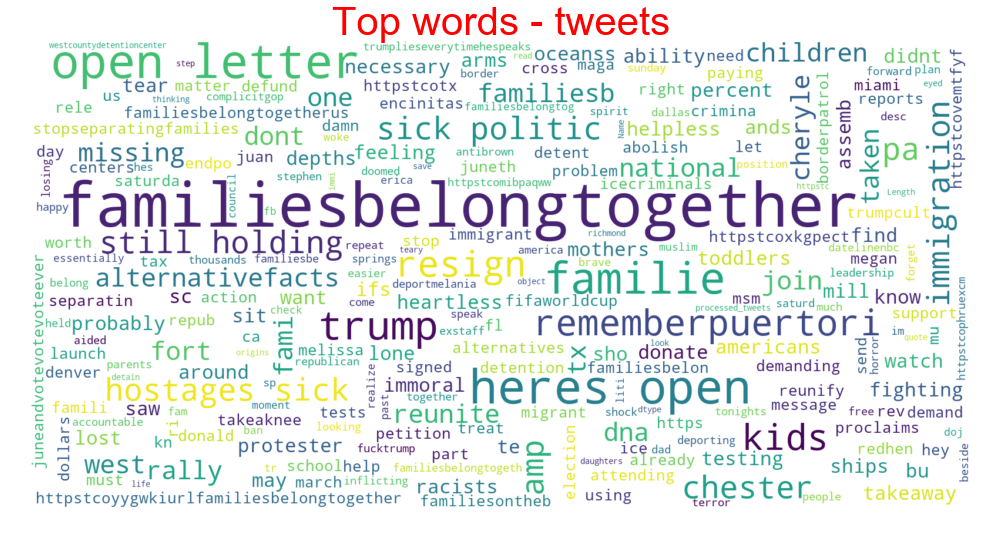

In [524]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(tweets_df['processed_tweets']))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top words - tweets", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

## Sentiment Analysis 

In [525]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [526]:
tweets_df['sentiment'] = tweets_df['processed_tweets'].apply(sentiment)

In [528]:
tweets_df[['cleaned_text','processed_tweets', 'sentiment']].head()

,cleaned_text,processed_tweets,sentiment
0,Trump is STILL holding kids as hostages in his...,trump still holding kids hostages sick politic...,-0.371429
1,Here’s an open letter from Cheryle in West Che...,heres open letter cheryle west chester pa fami...,0.000000
2,The takeaway percent of Americans are heartles...,takeaway percent americans heartless racists h...,0.000000
3,Here’s an open letter from Cheryle in West Che...,heres open letter cheryle west chester pa fami...,0.000000
4,We dont have to sit around feeling helpless We...,dont sit around feeling helpless donate assemb...,0.000000


In [529]:
tweets_df['processed_tweets'][1]

'heres open letter cheryle west chester pa familiesbelongtogether httpstcohzmvenqq'

In [530]:
tweets_df['senti']=''

In [274]:
tweets_df['senti'][tweets_df['sentiment']>0] = 'positive'
tweets_df['senti'][tweets_df['sentiment']<0] = 'negative'
tweets_df['senti'][tweets_df['sentiment']==0] = 'neutral'

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


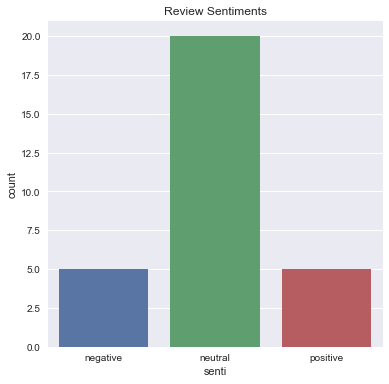

In [275]:
plt.figure(figsize=(6,6))
ax = sns.countplot(tweets_df['senti'])
plt.title('Review Sentiments');

In [277]:
tweets_df_pos = pd.DataFrame(tweets_df['processed_tweets'][tweets_df['senti']=='positive'])
tweets_df_neg = pd.DataFrame(tweets_df['processed_tweets'][tweets_df['senti']=='negative'])

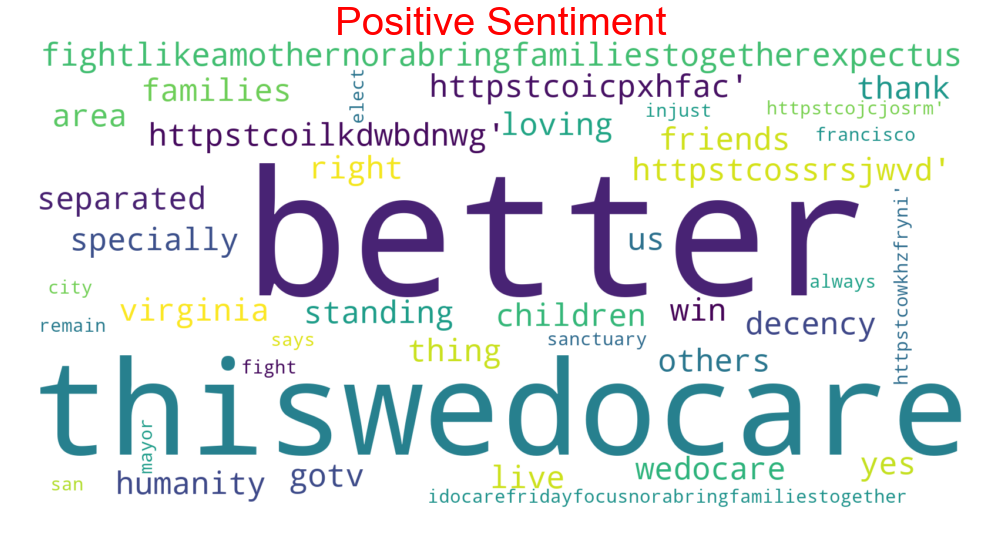

In [278]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(tweets_df_pos['processed_tweets'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

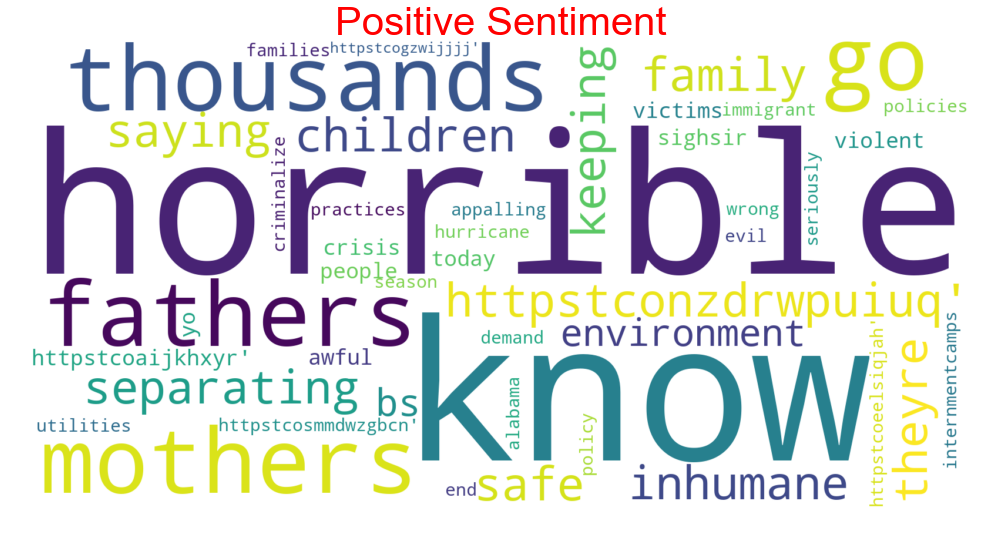

In [279]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(tweets_df_neg['processed_tweets'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

## Using Vader Sentiment 

In [280]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
tweets_df['sentiment'] = tweets_df['processed_tweets'].apply(sentiment)
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [394]:
def print_sentiment_scores(tweets):
    vadersenti = analyser.polarity_scores(tweets)
    return pd.Series([vadersenti['pos'], vadersenti['neg'], vadersenti['neu'], vadersenti['compound']])

In [395]:
tweets_df.processed_tweets[0], tweets_df.processed_tweets[1]

('appalling wrong demand end policies practices criminalize immigrant families httpstcogzwijjjj',
 'probably signing away children dont even know enough words httpstcotfpmodzv')

In [398]:
print_sentiment_scores(tweets_df.processed_tweets[0])

0    0.0000
1    0.5040
2    0.4960
3   -0.7269
dtype: float64

In [400]:
tweets_df['processed_tweets'].apply(print_sentiment_scores).head()

,0,1,2,3
0,0.000,0.504,0.496,-0.7269
1,0.000,0.000,1.000,0.0000
2,0.000,0.368,0.632,-0.5423
3,0.455,0.000,0.545,0.6124
4,0.000,0.239,0.761,-0.2960


In [422]:
tweets_df[['vadersenti_pos', 'vadersenti_neg', 'vadersenti_neu', 'vadersenti_compound']]  = tweets_df['cleaned_text'].apply(print_sentiment_scores) 

In [423]:
tweets_df.head().T

,0,1,2,3,4
created_at,2018-06-24 15:30:00,2018-06-24 15:01:45,2018-06-24 12:57:12,2018-06-24 05:38:52,2018-06-24 01:07:29
favorite_count,3,1,0,0,2
favorited,False,False,False,False,False
id,1010907904915005440,1010900793590009858,1010869448004251649,1010759141479141376,1010690843307642882
id_str,28348670,886021220,886021220,402133779,886021220
in_reply_to_screen_name,None,RepLoisFrankel,None,annewoj23,None
in_reply_to_status_id,NaN,1.01064e+18,NaN,NaN,NaN
in_reply_to_status_id_str,NaN,1.01064e+18,NaN,NaN,NaN
in_reply_to_user_id,NaN,1.07712e+09,NaN,4.60594e+08,NaN
in_reply_to_user_id_str,NaN,1.07712e+09,NaN,4.60594e+08,NaN


In [424]:
#tweets_df.drop(['vadersenti_compound', '(vadersenti_pos, vadersenti_neg)', 'vadersenti_neu', 'vadersenti_neg', 'vadersenti_pos', 'vadersenti'], axis=1, inplace=True)
#tweets_df.drop([ ('vadersenti_pos', 'vadersenti_neg')], axis=1, inplace=True)

In [425]:
tweets_df[['cleaned_text','vadersenti_pos','vadersenti_neg', 'vadersenti_neu','vadersenti_compound']].head()

,cleaned_text,vadersenti_pos,vadersenti_neg,vadersenti_neu,vadersenti_compound
0,This is appalling and wrong We demand the end ...,0.000,0.307,0.693,-0.7269
1,They are probably signing away their children ...,0.000,0.000,1.000,0.0000
2,This is horrible We all know there will be tho...,0.000,0.156,0.844,-0.5423
3,Please let us know how to help bringfamiliesto...,0.333,0.000,0.667,0.6124
4,This needs to be nationwide They are about to ...,0.000,0.095,0.905,-0.2960


D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


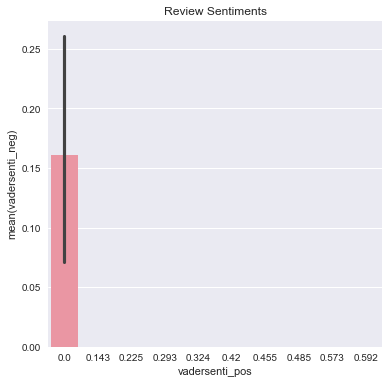

In [412]:
plt.figure(figsize=(6,6))
ax = sns.barplot(tweets_df['vadersenti_pos'], tweets_df['vadersenti_neg'])
plt.title('Review Sentiments');

In [417]:
(tweets_df['vadersenti_pos']>0).sum()

9